<a href="https://colab.research.google.com/github/Prachi-kushwaha/deeplearning-models-from-scratch/blob/main/lstm_from_scratch_mineipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("coin_Aave.csv")

In [3]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df['day'] = df.index.day
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek


In [5]:
df['day']
df['month']
x = df['day_of_week']
x+1

,day_of_week
Date,
2020-10-05 23:59:59,1
2020-10-06 23:59:59,2
2020-10-07 23:59:59,3
2020-10-08 23:59:59,4
2020-10-09 23:59:59,5
...,...
2021-07-02 23:59:59,5
2021-07-03 23:59:59,6
2021-07-04 23:59:59,7


In [6]:
df['dow_sin'] = np.sin(2*np.pi*df.index.dayofweek / 7)
df['dow_cos'] = np.cos(2*np.pi*df.index.dayofweek / 7)

In [7]:
print(df['dow_sin'])
print(df['dow_cos'])
df['time_idx'] = range(len(df))
print(df['time_idx'])

Date
2020-10-05 23:59:59    0.000000
2020-10-06 23:59:59    0.781831
2020-10-07 23:59:59    0.974928
2020-10-08 23:59:59    0.433884
2020-10-09 23:59:59   -0.433884
                         ...   
2021-07-02 23:59:59   -0.433884
2021-07-03 23:59:59   -0.974928
2021-07-04 23:59:59   -0.781831
2021-07-05 23:59:59    0.000000
2021-07-06 23:59:59    0.781831
Name: dow_sin, Length: 275, dtype: float64
Date
2020-10-05 23:59:59    1.000000
2020-10-06 23:59:59    0.623490
2020-10-07 23:59:59   -0.222521
2020-10-08 23:59:59   -0.900969
2020-10-09 23:59:59   -0.900969
                         ...   
2021-07-02 23:59:59   -0.900969
2021-07-03 23:59:59   -0.222521
2021-07-04 23:59:59    0.623490
2021-07-05 23:59:59    1.000000
2021-07-06 23:59:59    0.623490
Name: dow_cos, Length: 275, dtype: float64
Date
2020-10-05 23:59:59      0
2020-10-06 23:59:59      1
2020-10-07 23:59:59      2
2020-10-08 23:59:59      3
2020-10-09 23:59:59      4
                      ... 
2021-07-02 23:59:59    270
2021-0

In [8]:
df['ma_7'] = df['Close'].rolling(7).mean()
df['ma_30'] = df['Close'].rolling(30).mean()
df = df.dropna()

print(df['ma_7'])
print(df['ma_30'])

Date
2020-11-03 23:59:59     30.121337
2020-11-04 23:59:59     29.452909
2020-11-05 23:59:59     29.718236
2020-11-06 23:59:59     30.752468
2020-11-07 23:59:59     32.880665
                          ...    
2021-07-02 23:59:59    224.106705
2021-07-03 23:59:59    234.490040
2021-07-04 23:59:59    245.113239
2021-07-05 23:59:59    256.749894
2021-07-06 23:59:59    268.197414
Name: ma_7, Length: 246, dtype: float64
Date
2020-11-03 23:59:59     39.585852
2020-11-04 23:59:59     38.735713
2020-11-05 23:59:59     38.354181
2020-11-06 23:59:59     38.299963
2020-11-07 23:59:59     38.327978
                          ...    
2021-07-02 23:59:59    276.757901
2021-07-03 23:59:59    272.163144
2021-07-04 23:59:59    268.935016
2021-07-05 23:59:59    267.307061
2021-07-06 23:59:59    265.681677
Name: ma_30, Length: 246, dtype: float64


In [10]:
# print(df.columns)
work_col = df.drop(columns=['SNo', 'Name', 'Symbol', 'time_idx', 'day', 'month',	'day_of_week'])
df = df.reset_index(drop=True)
work_col.head()


,High,Low,Open,Close,Volume,Marketcap,dow_sin,dow_cos,ma_7,ma_30
0,30.062917,27.537111,29.731526,28.042803,5.677501e+07,3.164555e+08,0.781831,0.623490,30.121337,39.585852
1,28.433069,26.089518,28.042971,27.715084,5.046469e+07,3.130213e+08,0.974928,-0.222521,29.452909,38.735713
2,32.303040,25.966155,27.715080,30.955627,8.521241e+07,3.502055e+08,0.433884,-0.900969,29.718236,38.354181
3,40.769075,30.855128,30.955118,38.457441,1.473047e+08,4.358764e+08,-0.433884,-0.900969,30.752468,38.299963
4,51.427992,38.457441,38.457441,44.604900,2.005801e+08,5.077072e+08,-0.974928,-0.222521,32.880665,38.327978


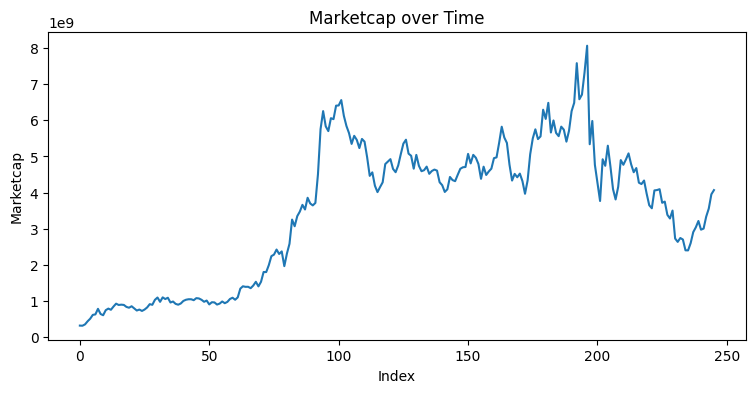

In [14]:
import matplotlib.pyplot as plt

# Plot 1: Line plot for Marketcap over time (index-based)
plt.figure(figsize=(9,4))
plt.plot(df.index, df['Marketcap'])
plt.title("Marketcap over Time")
plt.xlabel("Index")
plt.ylabel("Marketcap")
plt.show()

# Plot 2: Boxplot to detect outliers in numeric columns



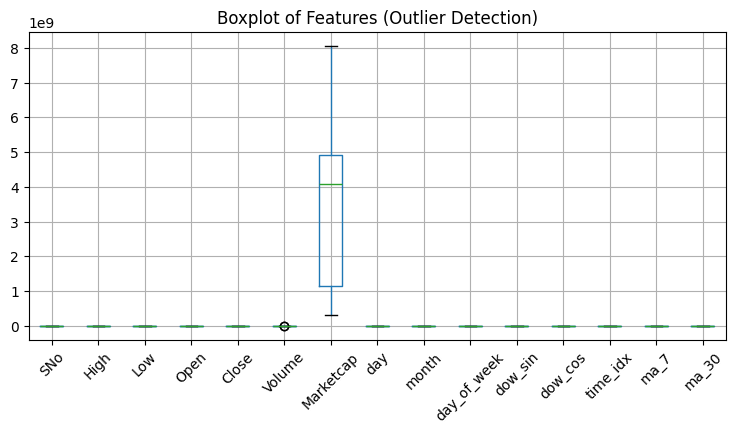

In [27]:
plt.figure(figsize=(9,4))
df.boxplot()
plt.title("Boxplot of Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

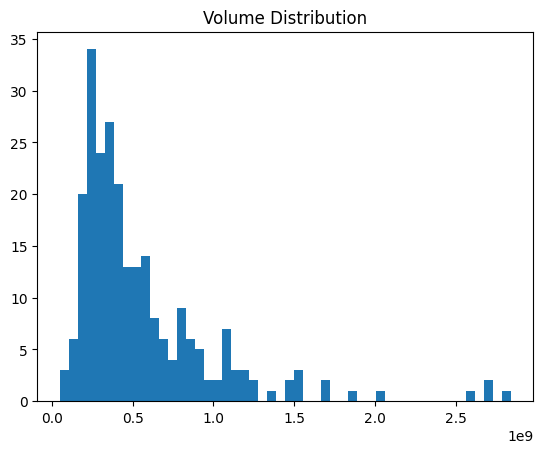

In [23]:
plt.figure()
plt.hist(df['Volume'], bins=50)
plt.title("Volume Distribution")
plt.show()

In [29]:
volume = np.log1p(df['Volume'])

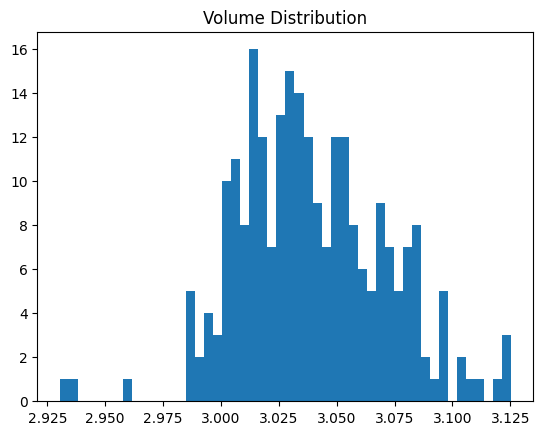

In [30]:
plt.figure()
plt.hist(df['Volume'], bins=50)
plt.title("Volume Distribution")
plt.show()

In [28]:
work_col

,High,Low,Open,Close,Volume,Marketcap,dow_sin,dow_cos,ma_7,ma_30
0,30.062917,27.537111,29.731526,28.042803,5.677501e+07,3.164555e+08,0.781831,0.623490,30.121337,39.585852
1,28.433069,26.089518,28.042971,27.715084,5.046469e+07,3.130213e+08,0.974928,-0.222521,29.452909,38.735713
2,32.303040,25.966155,27.715080,30.955627,8.521241e+07,3.502055e+08,0.433884,-0.900969,29.718236,38.354181
3,40.769075,30.855128,30.955118,38.457441,1.473047e+08,4.358764e+08,-0.433884,-0.900969,30.752468,38.299963
4,51.427992,38.457441,38.457441,44.604900,2.005801e+08,5.077072e+08,-0.974928,-0.222521,32.880665,38.327978


In [31]:
X = work_col.drop(columns=['Marketcap'])
y = work_col['Marketcap']

In [32]:
X.head()

,High,Low,Open,Close,Volume,dow_sin,dow_cos,ma_7,ma_30
0,30.062917,27.537111,29.731526,28.042803,5.677501e+07,0.781831,0.623490,30.121337,39.585852
1,28.433069,26.089518,28.042971,27.715084,5.046469e+07,0.974928,-0.222521,29.452909,38.735713
2,32.303040,25.966155,27.715080,30.955627,8.521241e+07,0.433884,-0.900969,29.718236,38.354181
3,40.769075,30.855128,30.955118,38.457441,1.473047e+08,-0.433884,-0.900969,30.752468,38.299963
4,51.427992,38.457441,38.457441,44.604900,2.005801e+08,-0.974928,-0.222521,32.880665,38.327978


In [33]:
y.shape

(246,)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [35]:
X_train.shape
y_train.shape

(196,)

In [36]:
X_test.shape
y_test.shape

(50,)

In [42]:
volume = np.log1p(X_train['Volume'])
X_train['Volume'] = volume
X_train.head()

,High,Low,Open,Close,Volume,dow_sin,dow_cos,ma_7,ma_30
174,407.972805,345.794757,347.643070,405.156723,3.066813,0.000000,1.000000,356.182831,380.936481
165,460.754625,422.824482,441.313954,430.174682,3.031450,-0.974928,-0.222521,419.592707,378.492257
43,89.480843,80.965402,87.225011,87.230058,3.031397,0.974928,-0.222521,81.855171,77.272481
54,81.526884,72.607265,74.875916,76.967985,3.004732,-0.781831,0.623490,78.932161,81.732467
96,479.956903,399.003337,472.601464,461.508337,3.092891,-0.781831,0.623490,409.923974,252.849862


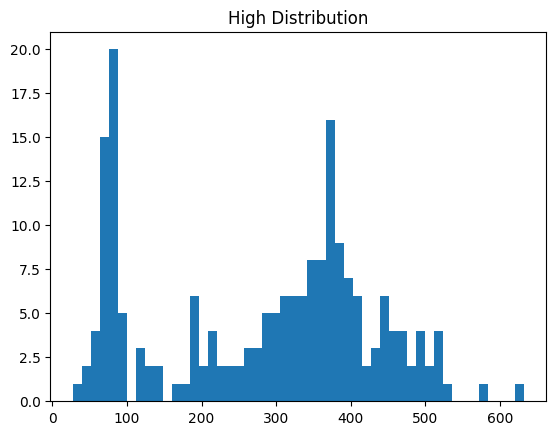

In [48]:
plt.figure()
plt.hist(X_train['Close'], bins=50)
plt.title("High Distribution")
plt.show()

In [65]:
sin_cos_train_data = X_train[['dow_sin', 'dow_cos']]
sin_cos_test_data = X_test[['dow_sin', 'dow_cos']]

In [58]:
ss = StandardScaler()

cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'ma_7', 'ma_30']
X_train_scale = ss.fit_transform(X_train[cols])
X_test_scale = ss.transform(X_test[cols])

In [63]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'ma_7', 'ma_30']

X_train_scale = ss.fit_transform(X_train[cols])
X_test_scale = ss.transform(X_test[cols])

X_train_scale = pd.DataFrame(
    X_train_scale,
    columns=cols,
    index=X_train.index
)

X_test_scale = pd.DataFrame(
    X_test_scale,
    columns=cols,
    index=X_test.index
)

X_train_scale.head()

,High,Low,Open,Close,Volume,ma_7,ma_30
174,0.689888,0.606141,0.458933,0.833509,0.838632,0.511751,0.722115
165,1.027254,1.167723,1.102049,1.004307,-0.301860,0.942989,0.705821
43,-1.345823,-1.324586,-1.329019,-1.336985,-0.303569,-1.353896,-1.302162
54,-1.396663,-1.385521,-1.413804,-1.407044,-1.163563,-1.373775,-1.272431
96,1.149990,0.994056,1.316859,1.218223,1.679721,0.877234,-0.131733


In [67]:
X_train_final = pd.concat(
    [X_train_scale, sin_cos_train_data],
    axis=1
)

X_test_final = pd.concat(
    [X_test_scale, sin_cos_test_data],
    axis=1
)

X_train_final.head()

,High,Low,Open,Close,Volume,ma_7,ma_30,dow_sin,dow_cos
174,0.689888,0.606141,0.458933,0.833509,0.838632,0.511751,0.722115,0.000000,1.000000
165,1.027254,1.167723,1.102049,1.004307,-0.301860,0.942989,0.705821,-0.974928,-0.222521
43,-1.345823,-1.324586,-1.329019,-1.336985,-0.303569,-1.353896,-1.302162,0.974928,-0.222521
54,-1.396663,-1.385521,-1.413804,-1.407044,-1.163563,-1.373775,-1.272431,-0.781831,0.623490
96,1.149990,0.994056,1.316859,1.218223,1.679721,0.877234,-0.131733,-0.781831,0.623490


In [68]:
X_train_final.isna().sum().sum() == 0
X_test_final.isna().sum().sum() == 0


np.True_

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class CustomLSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz):
        super().__init__()
        self.input_sz = input_sz
        self.hidden_size = hidden_sz
        self.W = nn.Parameter(torch.Tensor(input_sz, hidden_sz * 4))
        self.U = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz * 4))
        self.bias = nn.Parameter(torch.Tensor(hidden_sz * 4))
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, x,
                init_states=None):
        """Assumes x is of shape (batch, sequence, feature)"""
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(bs, self.hidden_size).to(x.device),
                        torch.zeros(bs, self.hidden_size).to(x.device))
        else:
            h_t, c_t = init_states

        HS = self.hidden_size
        for t in range(seq_sz):
            x_t = x[:, t, :]
            # batch the computations into a single matrix multiplication
            gates = x_t @ self.W + h_t @ self.U + self.bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :HS]), # input
                torch.sigmoid(gates[:, HS:HS*2]), # forget
                torch.tanh(gates[:, HS*2:HS*3]),
                torch.sigmoid(gates[:, HS*3:]), # output
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

In [ ]:
np.random.seed(0)
torch.manual_seed(0)

t = np.linspace(0, 100, 1000)
data = np.sin(t)

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        print(f" x are {x}")
        y = data[i + seq_length]
        print(f" y are {y}")
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data, seq_length)
print(f"X are {X.shape}")
print(f"X are {X}")
print(f"y are {y.shape}")
print(f"y are {y}")

trainX = torch.tensor(X[:, :, None], dtype=torch.float32)
trainY = torch.tensor(y[:, None], dtype=torch.float32)

 x are [0.         0.09993302 0.19886554 0.29580708 0.3897871  0.47986471
 0.56513807 0.64475345 0.71791378 0.7838866 ]
 y are 0.8420114062884005
 x are [0.09993302 0.19886554 0.29580708 0.3897871  0.47986471 0.56513807
 0.64475345 0.71791378 0.7838866  0.84201141]
 y are 0.8917062748888882
 x are [0.19886554 0.29580708 0.3897871  0.47986471 0.56513807 0.64475345
 0.71791378 0.7838866  0.84201141 0.89170627]
 y are 0.9324736780202824
 x are [0.29580708 0.3897871  0.47986471 0.56513807 0.64475345 0.71791378
 0.7838866  0.84201141 0.89170627 0.93247368]
 y are 0.9639054660553243
 x are [0.3897871  0.47986471 0.56513807 0.64475345 0.71791378 0.7838866
 0.84201141 0.89170627 0.93247368 0.96390547]
 y are 0.985686954427788
 x are [0.47986471 0.56513807 0.64475345 0.71791378 0.7838866  0.84201141
 0.89170627 0.93247368 0.96390547 0.98568695]
 y are 0.9976000741492778
 x are [0.56513807 0.64475345 0.71791378 0.7838866  0.84201141 0.89170627
 0.93247368 0.96390547 0.98568695 0.99760007]
 y are

In [ ]:
# t = np.linspace(0, 100, 1000)
# data = np.sin(t)
# # len(data)

# len(t)
# seq_length = 10
# x = data[1:(1 + seq_length)]
# y = data[1 + seq_length]
# y

np.float64(0.8917062748888882)

In [ ]:
# xs = []
# xs.append(x)
# xs

[array([0.09993302, 0.19886554, 0.29580708, 0.3897871 , 0.47986471,
        0.56513807, 0.64475345, 0.71791378, 0.7838866 , 0.84201141])]

In [ ]:
# np.array(xs)

array([[0.09993302, 0.19886554, 0.29580708, 0.3897871 , 0.47986471,
        0.56513807, 0.64475345, 0.71791378, 0.7838866 , 0.84201141]])

In [ ]:
# print(trainX.shape)
# (990, 10, 1)


torch.Size([990, 10, 1])
